# Prisoners Dilemma

One big area of repeated games is specifically the Prisoner's Dilemma. We have previously defined this as the following game:

$$
A =
\begin{pmatrix}
    3 & 0\\
    5 & 1
\end{pmatrix}\qquad
B =
\begin{pmatrix}
    3 & 5\\
    0 & 1
\end{pmatrix}
$$

The general form is:


$$
A =
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}\qquad
B =
\begin{pmatrix}
    R & T\\
    S & P
\end{pmatrix}
$$

with the following constraints:

$$T > R > P > S$$
$$2R > T + S$$

- The first constraint ensures that the second action "Defect" dominates the first action "Cooperate.
- The second constraint ensures that a social dilemma arises: the sum of the utilities to both players is best when they both cooperate.

This game is a good model of agent (human, etc) interaction: a player can choose to take a slight loss of utility for the benefit of the other play **and** themselves.

**Note: The rest of this chapter is a bit different: consider it a "History of Mathematics" chapter.**

As a single one shot game there is not much more to say about the Prisoner's dilemma. It becomes fascinating when studied as a repeated game.

---

## Axelrod's tournaments


In 1980, Robert Axelrod (a political scientist) invited submissions to a computer tournament version of an iterated prisoners dilemma. This was described in a 1980 paper titled ["Effective Choice in the Prisoner's Dilemma"](http://journals.sagepub.com/doi/abs/10.1177/002200278002400101).

### First tournament

- 15 strategies submitted. 
- Round robin tournament with 200 stages including a 16th player who played uniformly randomly.
- Some very complicated strategies, including for example a strategy that used a $\chi^2$ test to try and identify strategies that were acting randomly. You can read more about this tournament here: http://axelrod.readthedocs.io/en/stable/reference/overview_of_strategies.html#axelrod-s-first-tournament
- The winner (average score) was in fact a very simple strategy: Tit For Tat. This strategy starts by cooperating and then repeats the opponents previous move.

The fact that Tit For Tat won garnered a lot of research (still ongoing) as it showed a mathematical model of how cooperative behaviour can emerge in complex situations (why are we nice to each other?).
---

There is a Python library (`axelrod`) with over 200 strategies that can be used to reproduce this work. You can read the documentation for it here: http://axelrod.readthedocs.io.

Note that in version '3.0.0' two of the original strategies are not implemented so here is the best reproduction of Axelrod's tournament:

Finishing: 100%|██████████| 39/39 [00:00<00:00, 1137.97it/s]


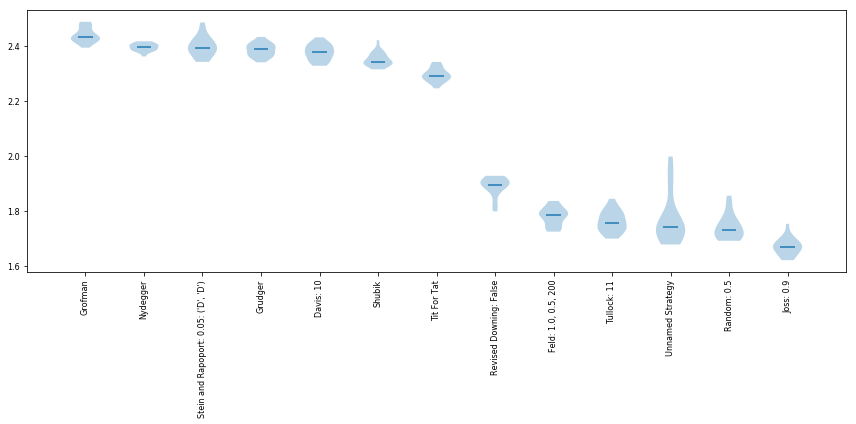

In [1]:
%matplotlib inline

import axelrod as axl
assert axl.__version__ == '3.0.0'

axl.seed(0)  # Make this reproducible
players = [axl.TitForTat(),
           axl.Nydegger(),
           axl.Grofman(),
           axl.Shubik(),
           axl.SteinAndRapoport(),
           axl.Grudger(),
           axl.Davis(),
           axl.RevisedDowning(revised=False),
           axl.Feld(),
           axl.Joss(),
           axl.Tullock(),
           axl.UnnamedStrategy(),
           axl.Random()]
tournament = axl.Tournament(players, turns=200, repetitions=20)
results = tournament.play()
plot = axl.Plot(results)
plot.boxplot();

We see that Tit For Tat does in fact **not** win this tournament. This highlights that there is no such thing as a best strategy but a best strategy for a particular environment.

Here is some of the source code for the strategies:

In [2]:
axl.TitForTat.strategy??

Tit For Tat:

```python
Signature: axl.TitForTat.strategy(self, opponent:axelrod.player.Player) -> str
Source:   
    def strategy(self, opponent: Player) -> Action:
        """This is the actual strategy"""
        # First move
        if not self.history:
            return C
        # React to the opponent's last move
        if opponent.history[-1] == D:
            return D
        return C
File:      ~/anaconda3/envs/gt/lib/python3.6/site-packages/axelrod/strategies/titfortat.py
Type:      function
```

In [3]:
axl.Grudger.strategy??

```python
Signature: axl.Grudger.strategy(opponent:axelrod.player.Player) -> str
Source:   
    @staticmethod
    def strategy(opponent: Player) -> Action:
        """Begins by playing C, then plays D for the remaining rounds if the
        opponent ever plays D."""
        if opponent.defections:
            return D
        return C
File:      ~/anaconda3/envs/gt/lib/python3.6/site-packages/axelrod/strategies/grudger.py
Type:      function
```

## Numerous variants of the this tournament have since been carried out:

- Using a Probabilistic end (players don't know how many turns are going to be played). This was carried out in Axelrod's Second tournament, which had 64 strategies and Tit For Tat also won! (Described in a 1980 paper titled: ["More effective choice in the Prisoner's Dilemma"](http://journals.sagepub.com/doi/abs/10.1177/002200278002400301)).
- Playing the tournament on a Graph. This was carried out by Nowak in 1992 in a paper titled: ["Evolutionary games and Spatial chaos"](https://www.researchgate.net/profile/Martin_Nowak2/publication/216634494_Evolutionary_Games_and_Spatial_Chaos/links/54217b730cf274a67fea8e60/Evolutionary-Games-and-Spatial-Chaos.pdf).
- Understanding Evolutionary dynamics (we will understand what we mean by this in the later chapters as we start exploring evolutionary game theory).
- A specific type of strategy has recently garnered a lot of interest: Zero Determinant Strategies (in a 2012 paper titled: [Iterated Prisoner’s Dilemma contains strategies that dominate any evolutionary opponent](http://www.pnas.org/content/109/26/10409.short)). Claiming that memory does not matter. We will discuss this in further chapters.